# Customer Segmentation Using K-Means Clustering.

# Attribute Information:

__InvoiceNo:__ Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

__StockCode:__ Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

__Description:__ Product (item) name. Nominal.

__Quantity:__ The quantities of each product (item) per transaction. Numeric.

__InvoiceDate:__ Invice Date and time. Numeric, the day and time when each transaction was generated.

__UnitPrice:__ Unit price. Numeric, Product price per unit in sterling.

__CustomerID:__ Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

__Country:__ Country name. Nominal, the name of the country where each customer resides.

# Data Information

__Abstract:__ This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

 __Dataset Link:__ https://archive.ics.uci.edu/ml/machine-learning-databases/00352/


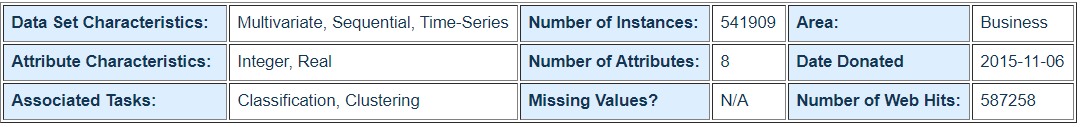

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file
data = pd.read_csv('Online Retail.csv', encoding= 'unicode_escape')
print("Shape of data: ", data.shape)

data

Shape of data:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Data exploaration

In [4]:
# Duplicating datatframe to keep original
data = data.copy()

In [5]:
# Checking for the unique number of countries
data.Country.nunique()

38

In [6]:
# Number of Countries in the country columm
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
# There are more customer cluster in the UK
customer_country=data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [8]:
# Since there are more cluster in the UK, more emphasis will be directed to the UK cluster. 
data = data.loc[data['Country'] == 'United Kingdom']

In [9]:
# Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

# Preprocessing data

In [10]:
# Removing missing values
data = data[pd.notnull(data['CustomerID'])]

In [11]:
'''Summary statistics to view data character. The Quantity column has a negative 
minimum value which needs to be removed. Quantity should not have a negative value'''

data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Removing negative value in quantity, checking shape and information of data.
data = data[(data['Quantity']>0)]
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [13]:
# Negative minimum value removed
data['Quantity'].describe()

count    354345.000000
mean         12.048913
std         190.428127
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [14]:
# Changing InvoiceDate datatype to datatime 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [15]:
# Checking unique values for each column
def unique_counts(data):
    for i in data.columns:
        count = data[i].nunique()
        print(i, ": ", count)
unique_counts(data)
data.info()

InvoiceNo :  16649
StockCode :  3645
Description :  3844
Quantity :  294
InvoiceDate :  15615
UnitPrice :  403
CustomerID :  3921
Country :  1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [16]:
# Total price column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [17]:
# first order date in the data.
data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [18]:
# Last order date in the data
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [19]:
# Recency is calculated as the last time a customer made purchase.
# The last invoice date is 2011–12–09, 2011–12–10 hence be used to calculate recency.

import datetime as dt
NOW = dt.datetime(2011,12,10)

# RFM Customer Segmentation

__RFM stands for Recency, Frequency and Monetary Value. The RFM analysis segments customers base on:__

__Recency(how many days since last purchase)__ 

__Frequency(number of times of purchase)__

__Monetray value(purchase in (£))__

In [20]:
#Creating a RFM table
rfmTable = data.groupby('CustomerID').agg({'InvoiceDate': lambda x:
                                          (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency','InvoiceNo': 'frequency', 'TotalPrice': 'monetary_value'}, inplace=True)

In [21]:
# Retrieve dataframe
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


__Interpetation__


CustomerID 12346 has frequency: 1, monetary value: £77,183.60 and recency: 325 days.

CustomerID 12747 has frequency: 103, monetary value: £4,196.01 and recency: 2 days

In [22]:
# First customer data
first_customer = data[data['CustomerID']==12346.0]
first_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


__Interpretation on first customer__

The first customer with CustomerID 12346 has only made one purchasal, bought one product at a huge quantity(74,215). The unit price appears to be very low compared to other items; perhaps it was a clearance sale.

In [23]:
# Quantiles makes it easy for us to segment customers into classes
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [24]:
# Creating a segmented RFM table
segmented_rfm = rfmTable

In [25]:
# This code segments the customers into 4 classes
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [26]:
# Creating segmented RFM table
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency', quantiles))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency', quantiles))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value', quantiles))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [27]:
# Combining RFM score in new column
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


__111 is the highest score, 444 is the lowest score.__ 

__Customers with 111 score are top loyal customers, customers with 444 are less loyal__

__A top customer is characterised by low recency, high frequency and monetary value. The converse is true for less loyal customers__

In [28]:
# Displaying first 10 customers with score 111
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [29]:
# Displaying first 10 customers with score 444
segmented_rfm[segmented_rfm['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
15609.0,184,16,298.48,4,4,4,444
17678.0,263,16,298.11,4,4,4,444
12881.0,275,7,298.00,4,4,4,444
17531.0,190,14,296.70,4,4,4,444
13751.0,288,9,296.25,4,4,4,444
16998.0,149,4,295.00,4,4,4,444
15732.0,212,14,294.12,4,4,4,444
12829.0,336,11,293.00,4,4,4,444
16526.0,171,15,290.36,4,4,4,444


__It is obvious that the first customer that was determined prevoiusly is not our best customer__

__Who are the top 10 of our best customers?__

__The table above shows our best first 10 customers.__

# KMeans Clustering Model Implementation

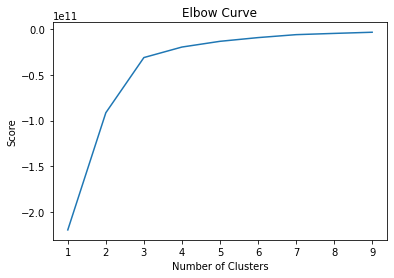

In [38]:
from sklearn.cluster import KMeans

# Get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.

# Elbow method is used to represnt that. 

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfmTable).score(rfmTable) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
# Creating the object of KMeans and fitting data to Kmeans model.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfmTable)

In [32]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfmTable['cluster'] = kmeans.labels_

In [33]:
#check our hypothesis

rfmTable[rfmTable.cluster == 0].head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,cluster
CustomerID,,,,,,,,
12747.0,2,103,4196.01,1,1,1,111,0
12749.0,3,199,4090.88,1,1,1,111,0
12820.0,3,59,942.34,1,2,2,122,0
12821.0,214,6,92.72,4,4,4,444,0
12822.0,70,46,948.88,3,2,2,322,0
12823.0,74,5,1759.50,3,4,1,341,0
12824.0,59,25,397.12,3,3,3,333,0
12826.0,2,91,1474.72,1,2,2,122,0
12827.0,5,25,430.15,1,3,3,133,0


# Visualisation of clusters

Here customers are segmented into:

Gold

Platinum

Silver

<AxesSubplot:xlabel='cluster', ylabel='recency'>

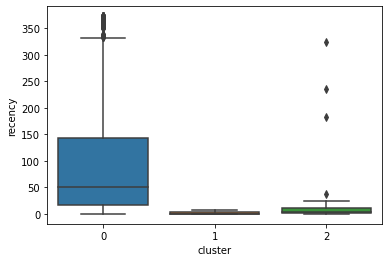

In [34]:
sns.boxplot(rfmTable.cluster, rfmTable.recency)

__cluster 0 have high recency rate(silver customer). 
Cluster 1 and cluster 2 having low so they are in race of platinum and gold customer.__

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

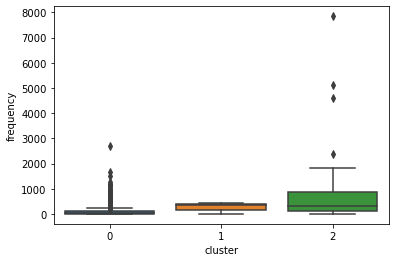

In [35]:
sns.boxplot(rfmTable.cluster, rfmTable.frequency)

__cluster 0 have low frequency rate(silver customer). 
cluster 1 and cluster 2 having high so they are in race of platinum and gold customer.__

<AxesSubplot:xlabel='cluster', ylabel='monetary_value'>

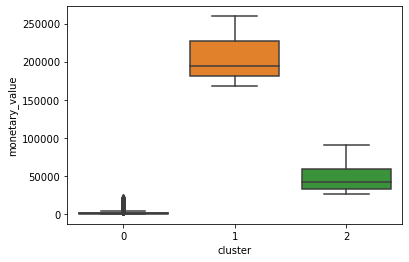

In [36]:
sns.boxplot(rfmTable.cluster, rfmTable.monetary_value)

__cluster 0 have low Monetary rate(silver customer).
cluster 1 have highest monetary rate(Gold customer) while 
cluster 2 have medium level(Platinum)__

# Reference

https://www.kaggle.com/yugagrawal95/rfm-analysis
    
https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6
    
https://github.com/iris9112/Customer-Segmentation 